# Airline Price EDA
This analysis explores various factors influencing airline prices, shedding light on key trends and considerations. Notable findings include the presence of outliers above $1200, emphasizing the need to consider airline pricing tendencies in dynamic markets. Vistara and Air India, with significantly higher averages, stand out as major players, driven by their market control, operational scale, and demand for consistent service.

Airport location impacts pricing, with Delhi and Hyderabad offering slightly lower fares, attributed to efficient cost distribution and central positioning, respectively. Mumbai and Delhi emerge as popular destinations, while Hyderabad stands out as a cost-effective departure point due to its central location.

Time analysis reveals night and mid-afternoon departures as more affordable, aligning with lower demand during these periods. First-class travel unsurprisingly commands higher prices. Trips with one stop, being the most frequent, correlate with higher costs, indicating high demand for this travel style.

Correlation analysis identifies attributes like class, airline choice, and duration as most influential. The Folium Map visually displays the locations of analyzed airports, providing geographical context to the findings.

This comprehensive exploration aims to enhance understanding and decision-making in the dynamic realm of airline pricing.

In [223]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import folium
import plotly.express as px

In [224]:
df = pd.read_csv('../data/clean_dataset.csv',index_col=False)
df.head()

,airline,flight,origin,departure_time,stops,arrival_time,destination,class,duration,price
0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,0,130,71.44
1,SpiceJet,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,0,140,71.44
2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,130,71.47
3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,0,135,71.46
4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,0,140,71.46


Text(0, 0.5, 'Price (USD)')

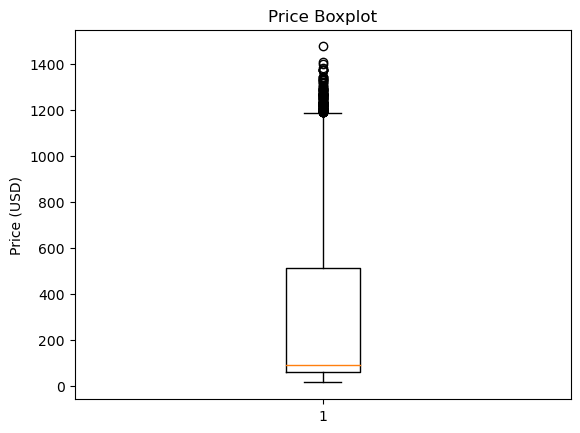

In [97]:
plt.boxplot(df['price'])
plt.title('Price Boxplot')
plt.ylabel('Price (USD)')

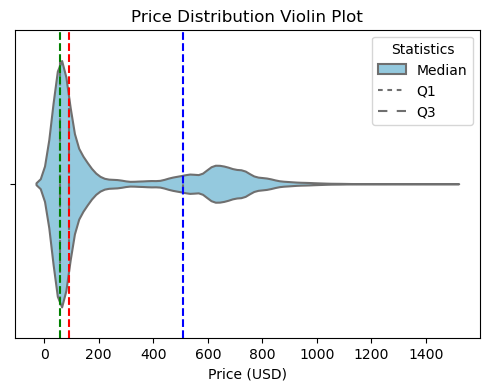

In [230]:
plt.figure(figsize=(6, 4))

sns.violinplot(x=df['price'], color='skyblue', inner='quartile')

median_val = df['price'].median()
q1_val = df['price'].quantile(0.25)
q3_val = df['price'].quantile(0.75)

plt.axvline(median_val, color='red', linestyle='--')
plt.axvline(q1_val, color='green', linestyle='--')
plt.axvline(q3_val, color='blue', linestyle='--')


plt.title('Price Distribution Violin Plot')
plt.xlabel('Price (USD)')


plt.legend({
    'Median': median_val,
    'Q1': q1_val,
    'Q3': q3_val
}, title='Statistics', loc='upper right')

plt.show()

Fair amount of outliers above the value of $1200. But this data should still be considered due to airline's tendencies towards spikeing prices depending on the market.

airline SpiceJet average price is 74.151626900455
airline AirAsia average price is 49.09351099515467
airline Vistara average price is 364.75832213610306
airline GO_FIRST average price is 67.82370690027187
airline Indigo average price is 63.890977968460106
airline Air_India average price is 282.08469811600656


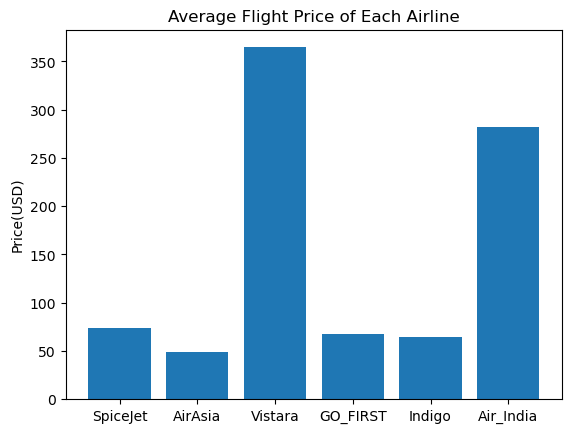

In [201]:
temp1_list = []
temp2_list = []
for i in df['airline'].unique():
    print(f"airline {i} average price is {df.groupby('airline').get_group(i)['price'].mean()}")
    temp1_list.append(i)
    temp2_list.append(df.groupby('airline').get_group(i)['price'].mean())
plt.bar(temp1_list,temp2_list);

plt.title('Average Flight Price of Each Airline');

plt.ylabel('Price(USD)');

Vistara and Air_india having signicantly higher average could be explained by many aspects. These two airlines are the largest operators in the area and thus have significantly more control of the market, as their market share is so big. Due to their size, their operating costs may be larger. And they may be able to give better and more consistent service, enabling the demand for their flights to be higher.

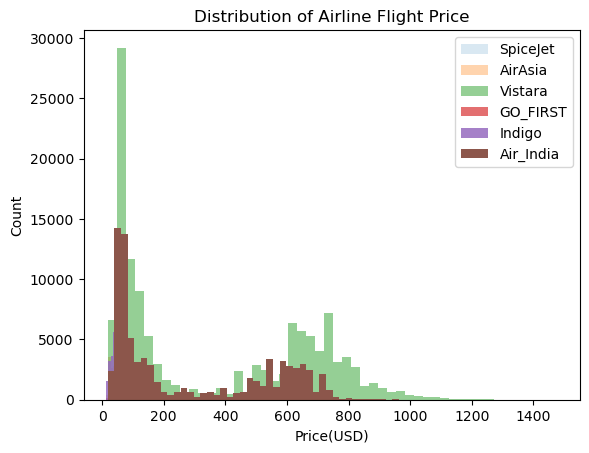

In [200]:
count = 0

for i in df['airline'].unique():
    count+=1
    plt.hist(df.groupby('airline').get_group(i)['price'],bins=50, label=i,alpha = count/(len(df['airline'].unique())))
    plt.legend()

plt.title('Distribution of Airline Flight Price');
plt.xlabel('Price(USD)')
plt.ylabel('Count');

Vistara and Air_india are the highest priced airlines, but they are also the two most popular airlines.

### Origin Analysis

from city Delhi average price is 227.41561579968376
from city Mumbai average price is 257.8064120796111
from city Bangalore average price is 257.6338295461094
from city Kolkata average price is 260.9550937493257
from city Hyderabad average price is 241.86771357153359
from city Chennai average price is 263.9438049095607


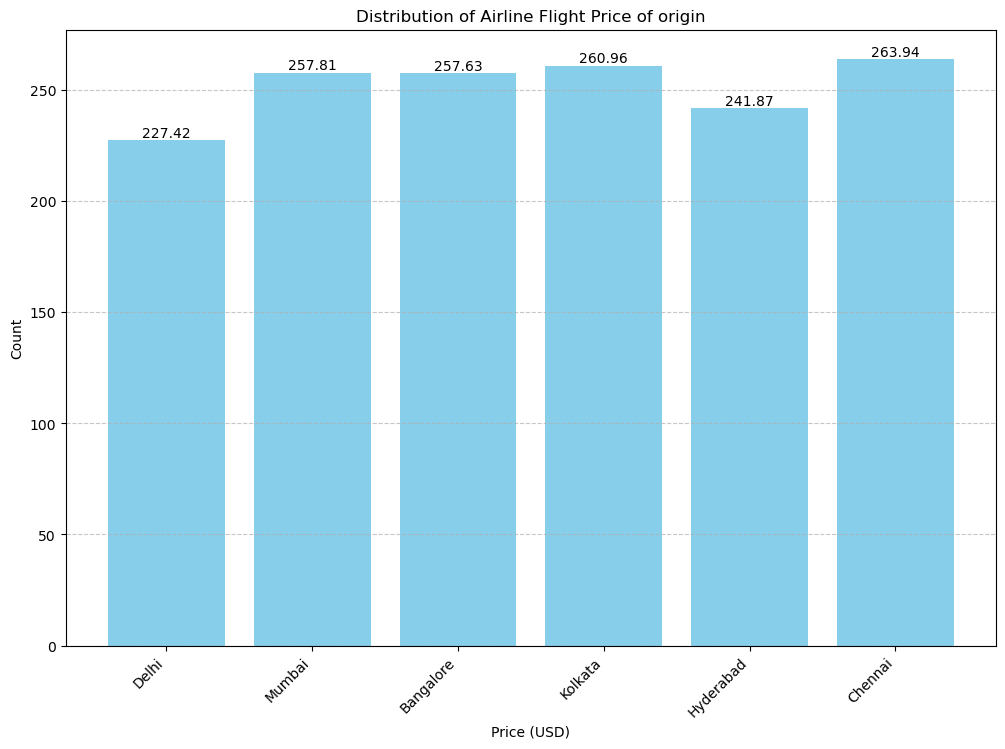

In [235]:
temp1_list = []
temp2_list = []
for i in df['origin'].unique():
    print(f"from city {i} average price is {df.groupby('origin').get_group(i)['price'].mean()}")
    temp1_list.append(i)
    temp2_list.append(df.groupby('origin').get_group(i)['price'].mean())
    
plt.figure(figsize=(12, 8))

bars = plt.bar(temp1_list, temp2_list, color='skyblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom')

plt.title('Distribution of Airline Flight Price of origin')
plt.xlabel('Price (USD)')
plt.ylabel('Count')

plt.xticks(rotation=45, ha='right')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

By a small margin we see that Delhi and Hyderabad are slightly cheaper to flight out of. For Hyderabad this is likely due to its location. Hyderabad is the most centrally located so it is a shorter distance to each other airport and thus has lower costs. Delhi on the other hand is the busiest airport in india and has the highets number of passengers coming through, and so they might beable to distribute their costs more efficiently.

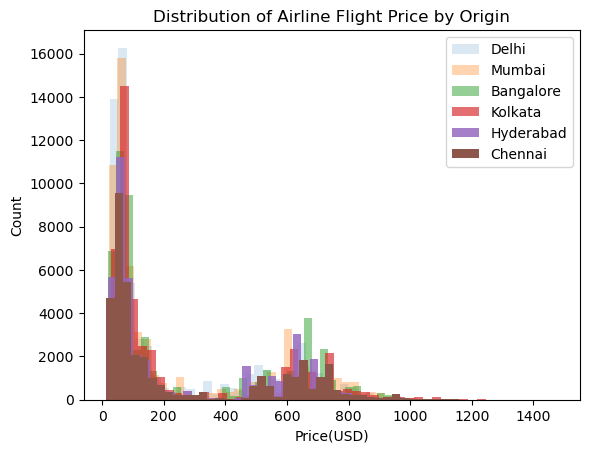

In [209]:
count = 0

for i in df['origin'].unique():
    count+=1
    plt.hist(df.groupby('origin').get_group(i)['price'],bins=50, label=i, alpha = count/(len(df['origin'].unique())))
    plt.legend()
    
plt.title('Distribution of Airline Flight Price by Origin');
plt.xlabel('Price(USD)')
plt.ylabel('Count');

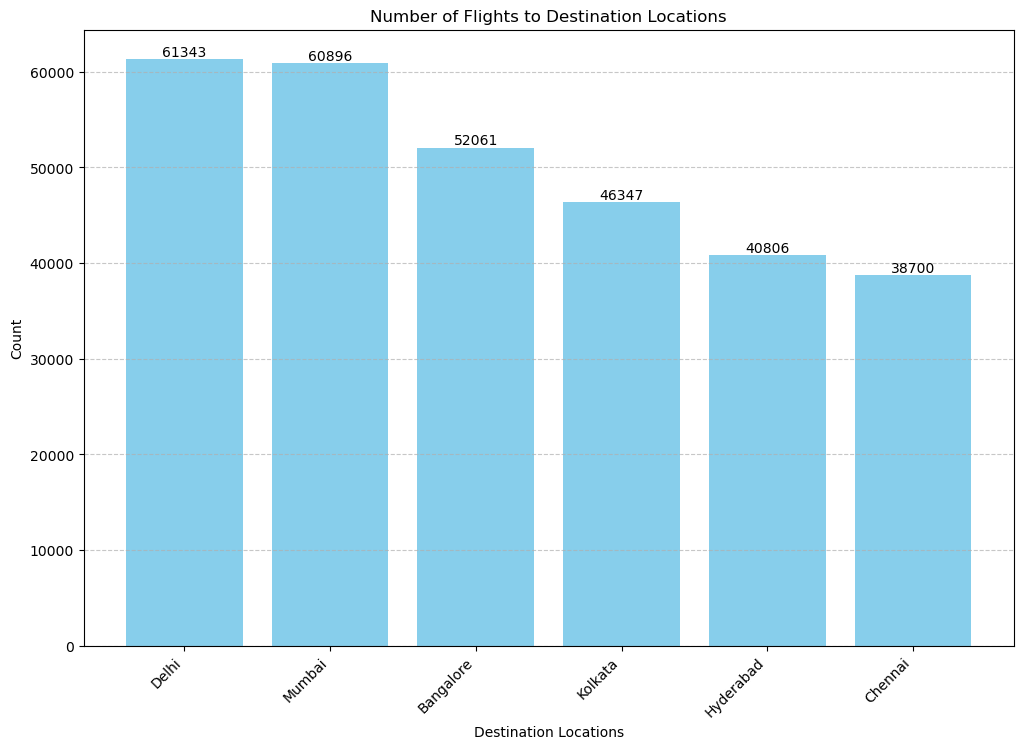

In [236]:
plt.figure(figsize=(12, 8))

bars = plt.bar(df['origin'].value_counts().index, df['origin'].value_counts().values, color='skyblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, int(yval), ha='center', va='bottom', fontsize=10, color='black')

plt.title('Number of Flights to Destination Locations')
plt.xlabel('Destination Locations')
plt.ylabel('Count')

plt.xticks(rotation=45, ha='right')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### Destination Analysis
Hyderabad once again is one of the cheapest to fly to, likely due to its central location.

to city Mumbai average price is 256.47054402084706
to city Bangalore average price is 259.12747571864963
to city Kolkata average price is 263.5147995316348
to city Hyderabad average price is 245.13201820905303
to city Chennai average price is 263.4401835612366
to city Delhi average price is 221.24141213389123


<BarContainer object of 6 artists>

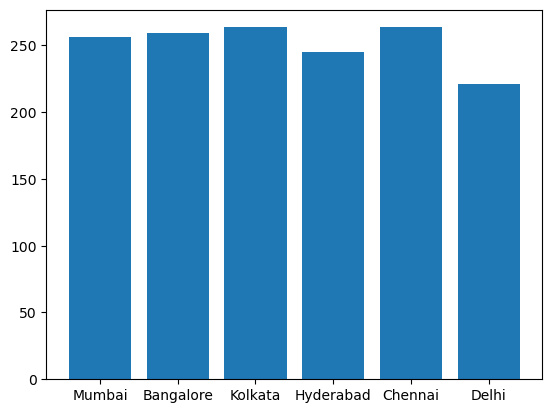

In [104]:
temp1_list = []
temp2_list = []
for i in df['destination'].unique():
    print(f"to city {i} average price is {df.groupby('destination').get_group(i)['price'].mean()}")
    temp1_list.append(i)
    temp2_list.append(df.groupby('destination').get_group(i)['price'].mean())
    
plt.bar(temp1_list,temp2_list)

plt.title('Distribution of Airline Flight Price');
plt.xlabel('Price(USD)')
plt.ylabel('Count');

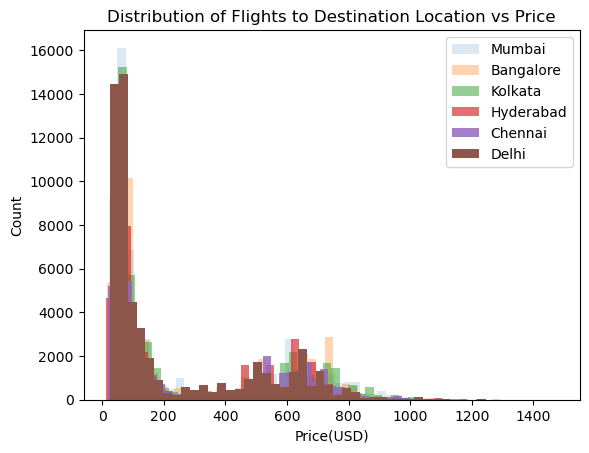

In [211]:
count = 0
for i in df['destination'].unique():
    count+=1
    plt.hist(df.groupby('destination').get_group(i)['price'],bins=50, label=i,alpha = count/(len(df['destination'].unique())))
    plt.legend()
    
plt.title('Distribution of Flights to Destination Location vs Price');
plt.xlabel('Price(USD)')
plt.ylabel('Count');

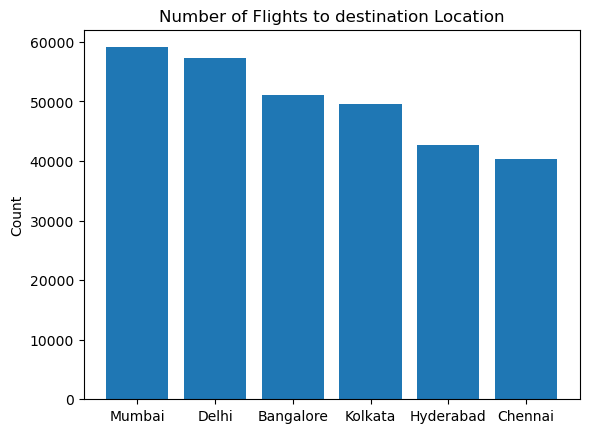

In [210]:
plt.bar(df['destination'].value_counts().index, df['destination'].value_counts().values)

plt.title('Number of Flights to destination Location');
plt.ylabel('Count');

Mumbai and Delhi most popular destination. Delhi and Hyderabad still are the cheapest to fly to.

### Departure Time Analysis

Cheapest to depart night, followed by mid afternoon. This is likely because it puts strain in the body to travel through the night, so demand is lower for these times.

to city Early_Morning average price is 244.44842072166492
to city Morning average price is 259.5691995333539
to city Afternoon average price is 218.15052475206093
to city Evening average price is 254.78841832816195
to city Night average price is 276.74593522857447
to city Late_Night average price is 111.54435681470137


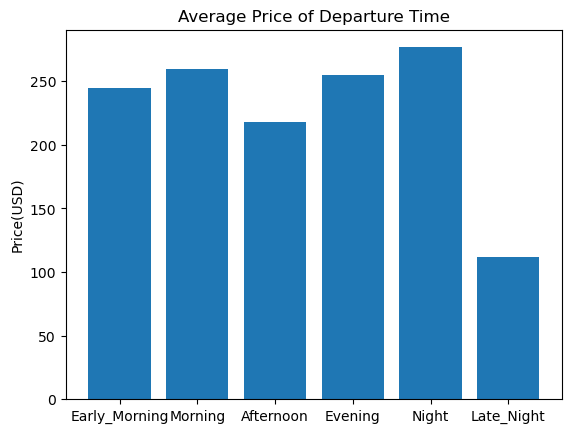

In [220]:
temp1_list = []
temp2_list = []
for i in ['Early_Morning','Morning',  'Afternoon','Evening',  'Night','Late_Night']:
    print(f"to city {i} average price is {df.groupby('departure_time').get_group(i)['price'].mean()}")
    temp1_list.append(i)
    temp2_list.append(df.groupby('departure_time').get_group(i)['price'].mean())
    
plt.bar(temp1_list,temp2_list);
plt.title('Average Price of Departure Time');
plt.ylabel('Price(USD)');

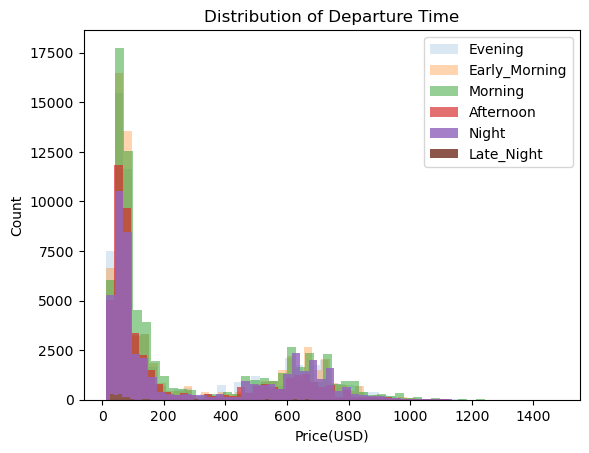

In [213]:
count = 0
for i in df['departure_time'].unique():
    count+=1
    plt.hist(df.groupby('departure_time').get_group(i)['price'],bins=50, label=i,alpha = count/(len(df['departure_time'].unique())))
    plt.legend()
    
plt.title('Distribution of Departure Time');
plt.xlabel('Price(USD)')
plt.ylabel('Count');

### Class Analysis
As expected traveling first class is substantially more expensive.

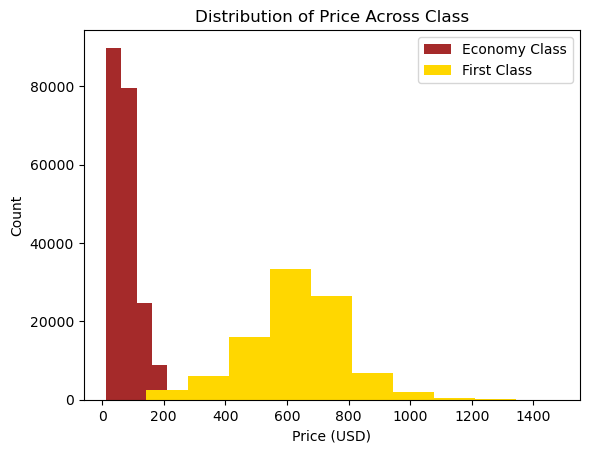

In [215]:
plt.hist(df.groupby('class').get_group(0)['price'], color='brown', label='Economy Class')
plt.hist(df.groupby('class').get_group(1)['price'], color='gold',label='First Class')
plt.title('Distribution of Price Across Class')
plt.xlabel('Price (USD)')
plt.ylabel('Count')
plt.legend();

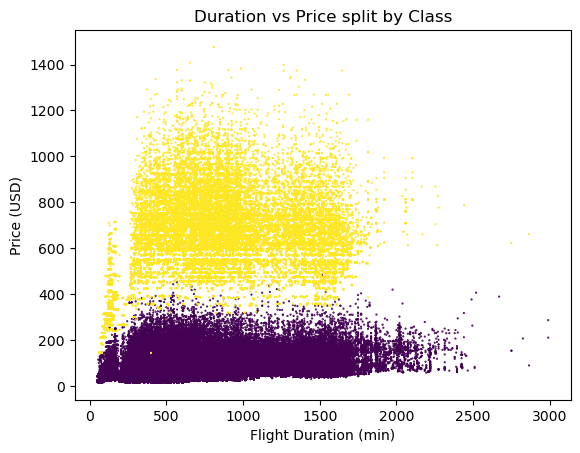

In [115]:
econ = df.groupby('class').get_group(0)
first = df.groupby('class').get_group(1)
plt.scatter(df['duration'], df['price'],c=df['class'],cmap='viridis',s=0.3)
plt.title('Duration vs Price split by Class')
plt.ylabel('Price (USD)')
plt.xlabel('Flight Duration (min)');

### Stops Analysis
As can be seen by the histogram trips with one stop likely are the most expensive, because they are the most frequently used so demand for this style must be quite high

to city 0 average price is 112.51175424952784
to city 1 average price is 274.8120197876929
to city 2 average price is 169.36129534848712


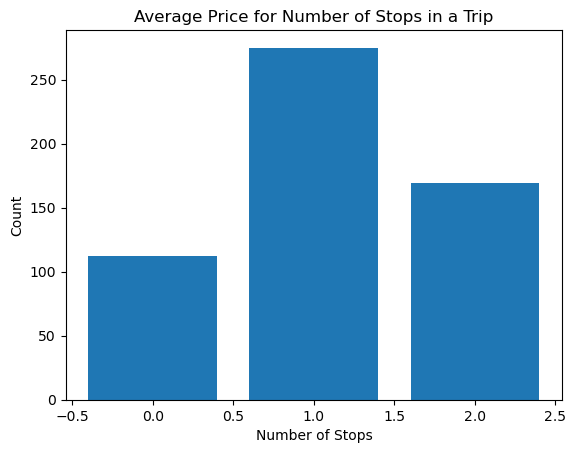

In [216]:
temp1_list = []
temp2_list = []
for i in df['stops'].unique():
    print(f"to city {i} average price is {df.groupby('stops').get_group(i)['price'].mean()}")
    temp1_list.append(i)
    temp2_list.append(df.groupby('stops').get_group(i)['price'].mean())
    
plt.bar(temp1_list,temp2_list);
plt.title('Average Price for Number of Stops in a Trip');
plt.xlabel('Number of Stops')
plt.ylabel('Count');

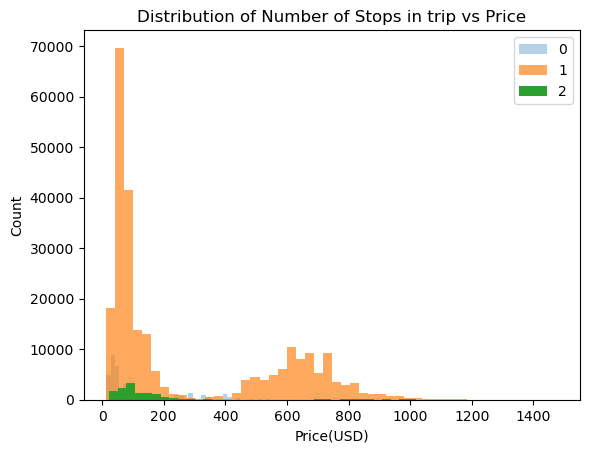

In [217]:
count = 0
for i in df['stops'].unique():
    count+=1
    plt.hist(df.groupby('stops').get_group(i)['price'],bins=50, label=i,alpha = count/(len(df['stops'].unique())))
    plt.legend()

plt.title('Distribution of Number of Stops in trip vs Price');
plt.xlabel('Price(USD)')
plt.ylabel('Count');

### Location Analysis
Location analysis is in comparison of the most central airport Hyderabad

In [111]:
cities = {'Delhi': (28.6139, 77.2090),'Mumbai': (19.0760, 72.8777),'Bangalore': (12.9716, 77.5946), 'Kolkata': (22.5726, 88.3639), 'Chennai': (13.0827, 80.2707),'Hyderabad': (17.3850, 78.4867)}

In [112]:
def angle_to_cardinal(angle):
    directions = ["E", "NE", "N", "NW", "W", "SW", "S", "SE", "E"]
    index = round(angle / 45) % 8
    return directions[index]

In [113]:
lat, long = cities['Hyderabad']
for i in cities:
    x,y = cities[i]
    opp =  x- lat
    adj = y-long

    try:
        print(math.degrees(math.atan2(opp,adj)))
        print(i)
        print(angle_to_cardinal(math.degrees(math.atan2(opp,adj))))
    except: 1

96.49158001814982
Delhi
N
163.22300374631428
Mumbai
W
-101.42747311931137
Bangalore
S
27.70888517059428
Kolkata
NE
-67.478076298245
Chennai
SE
0.0
Hyderabad
E


In [218]:
df['origin_lat_long'] = df['origin'].map(cities)

df['destination_lat_long'] = df['destination'].map(cities)

In [114]:
city_direction = {'Delhi': 'N','Mumbai': 'W','Bangalore': 'S', 'Kolkata': 'NE', 'Chennai': 'SE', 'Hyderabad': '0'}

df_w_dir = df
df_w_dir['card_direction'] = df['destination'].map(city_direction)

### Feature Engineered Location Columns

In [134]:
lat_list = []
long_list = []

for lat, long in df['origin_lat_long']:
    lat_list.append(lat)
    long_list.append(long)
    
df['origin_latitude'] = lat_list
df['origin_longitude'] = long_list

In [135]:
lat_list = []
long_list = []

for lat, long in df['destination_lat_long']:
    lat_list.append(lat)
    long_list.append(long)
    
df['destination_latitude'] = lat_list
df['destination_longitude'] = long_list

In [185]:
df.to_csv('../data/feature_eng_data.csv')

### Folium Map

In [183]:
new_df = df.sample(frac = 0.0005)

map_center = [cities['Hyderabad'][0], cities['Hyderabad'][1]]  
folium_map = folium.Map(location=map_center, zoom_start=4)

for index, row in new_df.iterrows():
    folium.Marker([row['origin_latitude'], row['origin_longitude']], popup=row['origin']).add_to(folium_map)
    folium.Marker([row['destination_latitude'], row['destination_longitude']], popup=row['destination']).add_to(folium_map)

folium_map.save('folium_map1.html')


### Creation of Dummy Columns
Most correlated attributes are class, which airline, and duration.

In [194]:
time_of_day = {'Early_Morning': 0, 'Morning':1, 'Afternoon':2,'Evening':3, 'Night':4,'Late_Night':5} ### dictionary for time of day ordinal encoding

In [195]:
dummy_df = pd.concat([pd.get_dummies(df['airline'],dtype = int),pd.get_dummies(df['origin'], dtype = int),pd.get_dummies(df['destination'], dtype = int),df['departure_time'].map(time_of_day),df['arrival_time'].map(time_of_day),df['duration'],df['class'],df['stops'],df['price']], axis = 1)

In [196]:
pd.DataFrame(dummy_df.corr()['price']).sort_values(by = 'price')

,price
Indigo,-0.280882
GO_FIRST,-0.194180
AirAsia,-0.176187
SpiceJet,-0.114018
Delhi,-0.052527
Delhi,-0.043282
Hyderabad,-0.012828
Hyderabad,-0.008292
arrival_time,-0.001019
Mumbai,0.010534


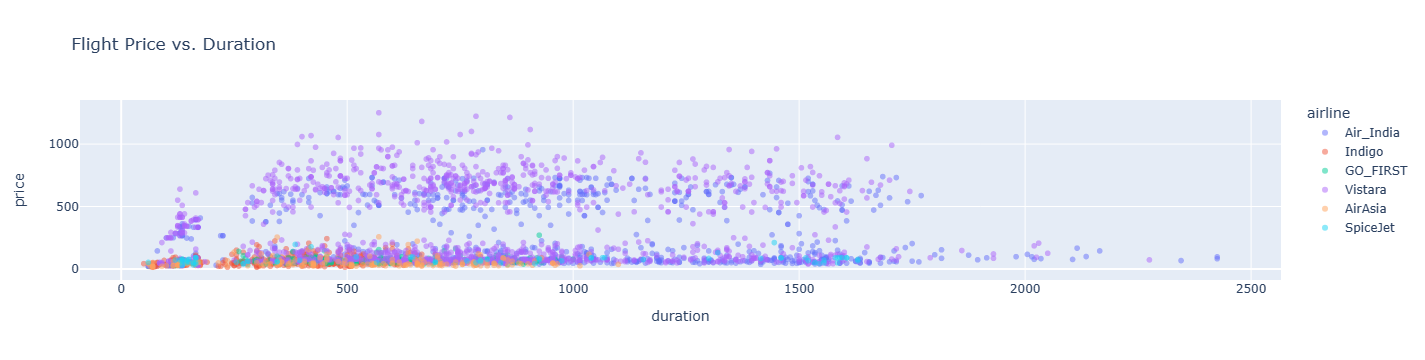

In [192]:
new_df = df.sample(frac = 0.01)


fig = px.scatter(new_df, x='duration', y='price', color='airline', hover_data=['origin', 'destination'],
                 title='Flight Price vs. Duration',opacity =0.5)
fig.show()

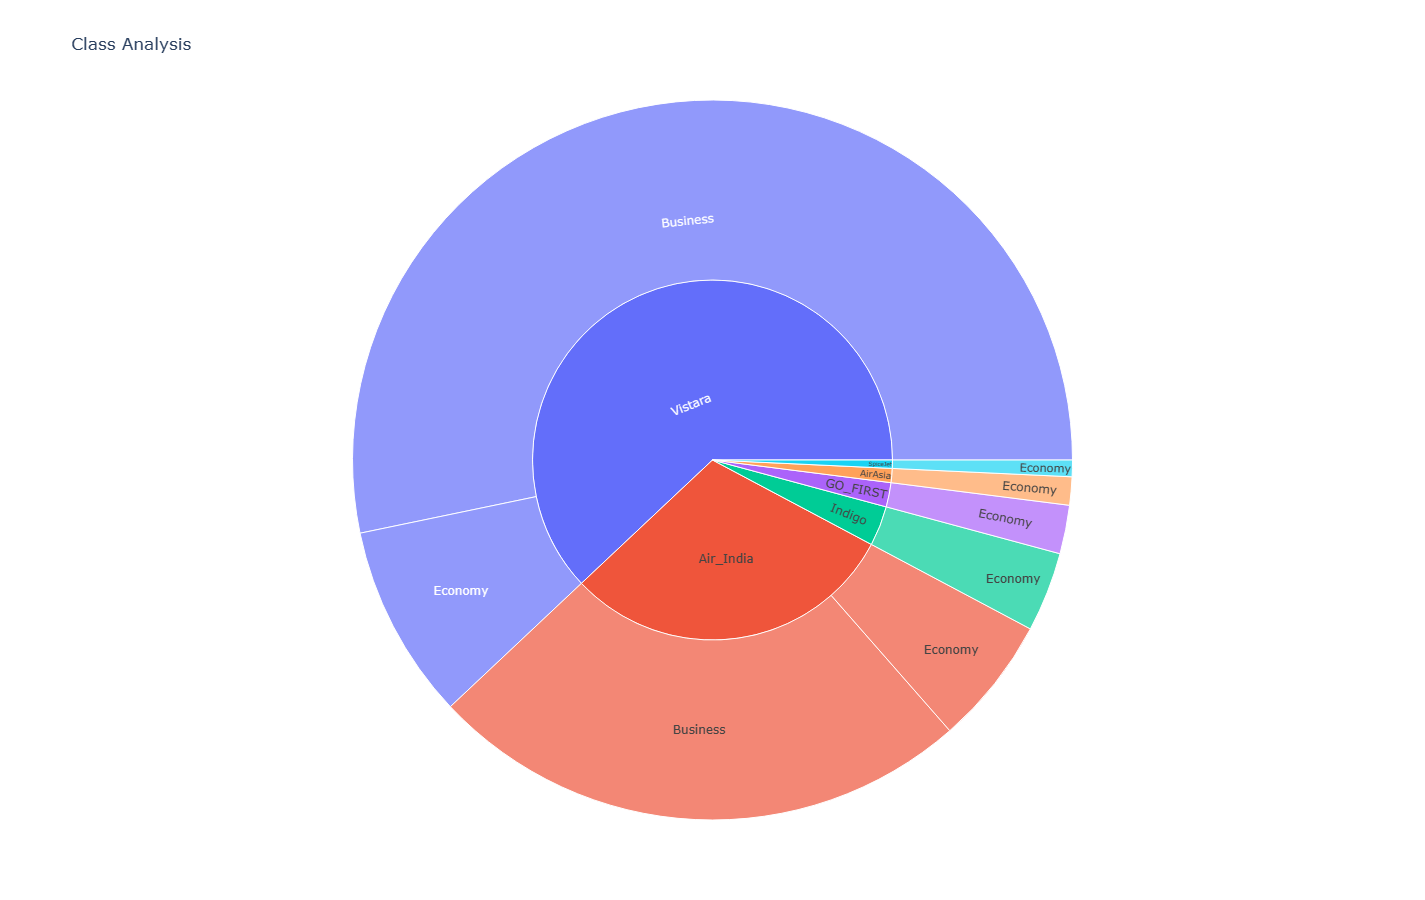

In [247]:
new_df['class_label'] = new_df['class'].map({0: 'Economy', 1: 'Business'})

sunburst_chart = px.sunburst(new_df, path=['airline', 'class_label'], values='price',
                              title='Class Analysis',
                              #labels={'airline': 'Airline', 'stops': 'Number of Stops', 'price': 'Average Price'},
                              hover_data=['price'])
sunburst_chart.update_layout(width=900, height=900, legend=dict(title='Legend Title'))

sunburst_chart.show()